### 1. Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\anshuman\Desktop\MlProject\notebook\data\students.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Data types

In [3]:
cat_columns = [cols for cols in df.columns if df[cols].dtype=="object"]
num_columns = [num for num in df.columns if df[num].dtype=="int64"]

cat_columns,num_columns

(['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'],
 ['math_score', 'reading_score', 'writing_score'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From above we can conclude that any column does not have any missing value
- We can also say that if a student can do better in one subject he can do better in another subject 

#### Adding new features for better understanding

In [6]:
df['Average_score'] = list(map(lambda x, y, z: int((x + y + z) / 3), df['math_score'], df['reading_score'], df['writing_score']))


In [7]:
df["total_score"] = list(map(lambda x, y, z: (x + y + z), df['math_score'], df['writing_score'], df['reading_score']))

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,218
1,female,group C,some college,standard,completed,69,90,88,82,247
2,female,group B,master's degree,standard,none,90,95,93,92,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,148
4,male,group C,some college,standard,none,76,78,75,76,229


### 2. Exploring data

In [9]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
Average_score                   73
total_score                    194
dtype: int64

In [10]:
df["parental_level_of_education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

#### 3. Visualizing data

In [11]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

##### Categories and their proportion

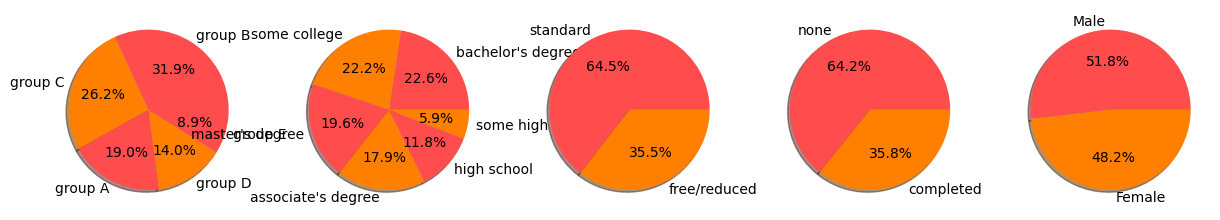

In [12]:
fig, axs = plt.subplots(1,5,figsize=(15,4))
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],)
plt.subplot(1,5,1)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].unique(),autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],)
plt.subplot(1,5,2)
plt.pie(x=df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].unique(),autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],)
plt.subplot(1,5,3)
plt.pie(x=df['lunch'].value_counts(),labels=df['lunch'].unique(),autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],)
plt.subplot(1,5,4)
plt.pie(x=df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].unique(),autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],)
plt.subplot(1,5,5)
# plt.title("Pie charts",fontsize=10)
plt.show()


##### From above we can see the proportion of different values in different categories

#### Finding relations between different categories

<Axes: xlabel='Average_score', ylabel='Count'>

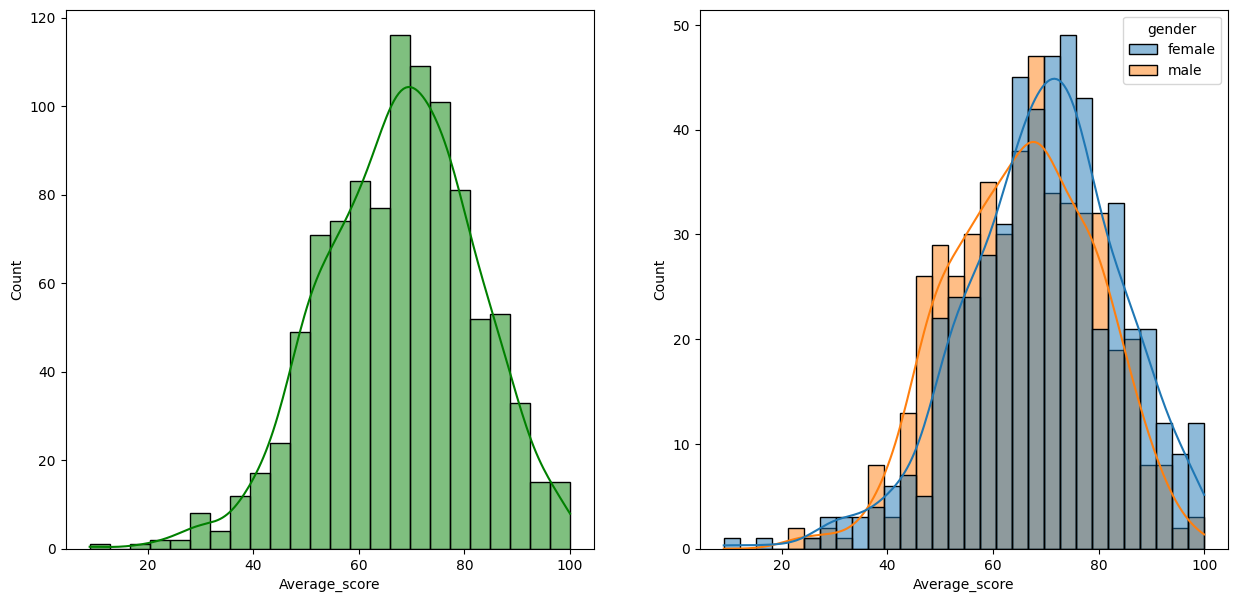

In [13]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x="Average_score",kde=True,bins=30,hue="gender")
plt.subplot(121)
sns.histplot(data=df,x="Average_score",kde=True,color="g")
plt.subplot(122)


#### Females are performing better than males

<Axes: xlabel='Average_score', ylabel='Count'>

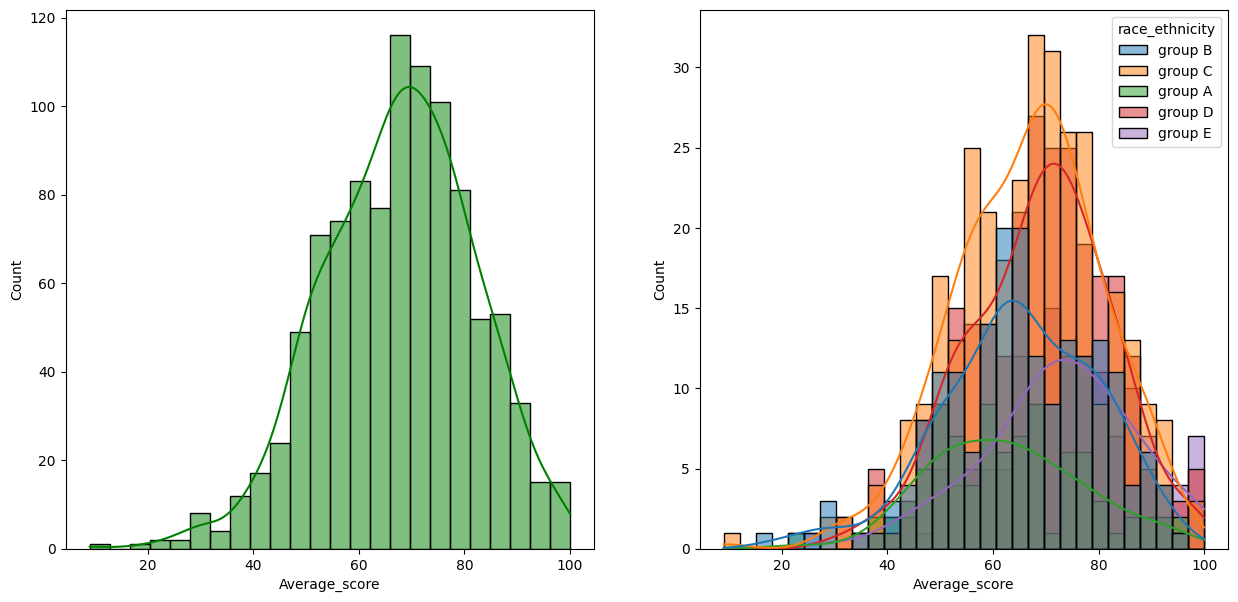

In [14]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x="Average_score",kde=True,bins=30,hue="race_ethnicity")
plt.subplot(121)
sns.histplot(data=df,x="Average_score",kde=True,color="g")
plt.subplot(122)


#### From above we can say that marks vary from different socio-groups

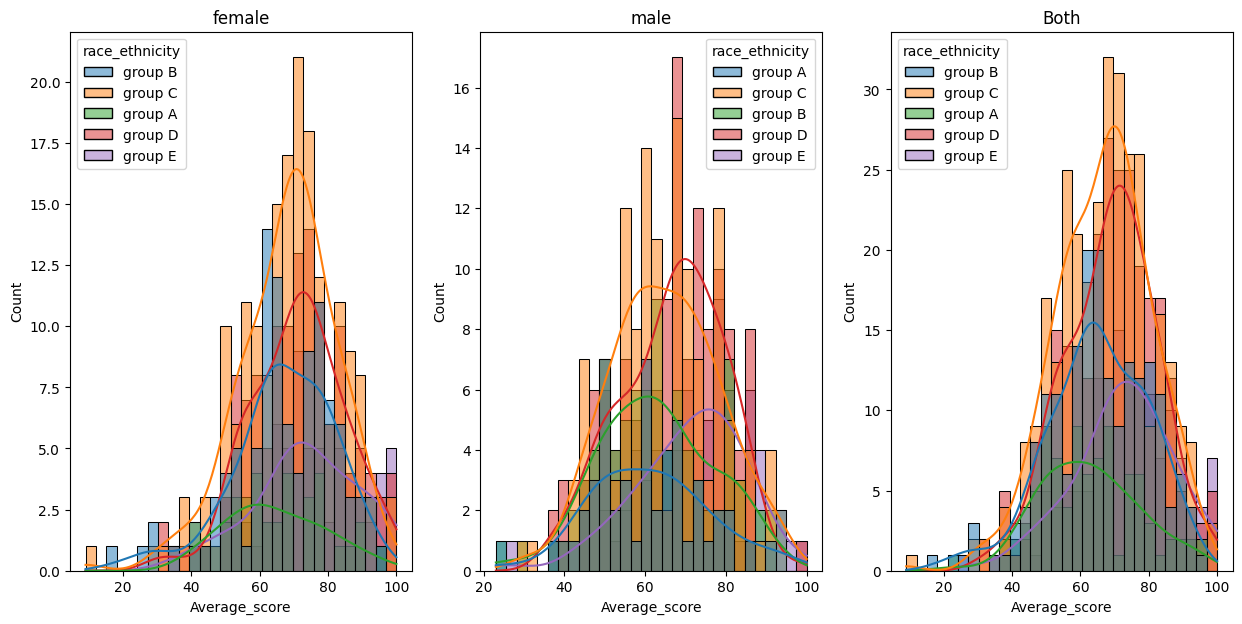

In [15]:
fig,axs = plt.subplots(1,3,figsize=(15,7))

sns.histplot(data=df,x="Average_score",kde=True,bins=30,hue="race_ethnicity")
plt.title("Both")
plt.subplot(1,3,1)
sns.histplot(data=df[df["gender"]=="female"],x="Average_score",kde=True,bins=30,hue="race_ethnicity")
plt.title("female")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"],x="Average_score",kde=True,bins=30,hue="race_ethnicity")
plt.title("male")
plt.subplot(1,3,3)
plt.show()

- In this, in males we can say that Group D and C both have the same height.
- But in female we can say that Group C is more well performing than D.

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,218
1,female,group C,some college,standard,completed,69,90,88,82,247
2,female,group B,master's degree,standard,none,90,95,93,92,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,148
4,male,group C,some college,standard,none,76,78,75,76,229


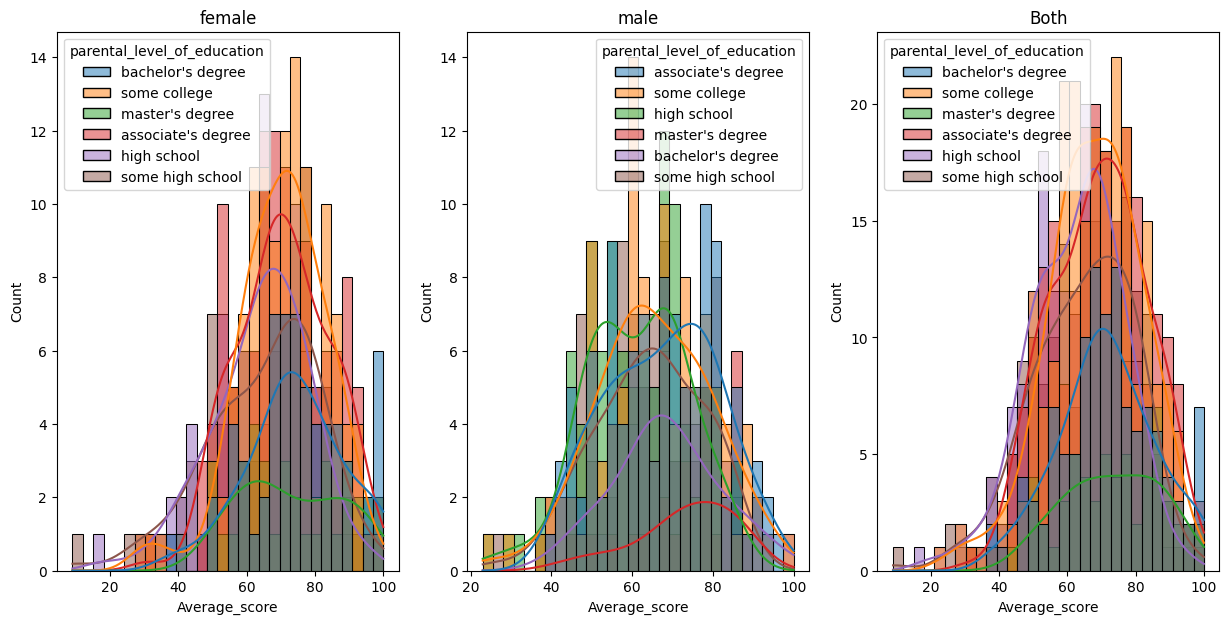

In [18]:
fig,axs = plt.subplots(1,3,figsize=(15,7))

sns.histplot(data=df,x="Average_score",kde=True,bins=30,hue="parental_level_of_education")
plt.title("Both")
plt.subplot(1,3,1)
sns.histplot(data=df[df["gender"]=="female"],x="Average_score",kde=True,bins=30,hue="parental_level_of_education")
plt.title("female")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"],x="Average_score",kde=True,bins=30,hue="parental_level_of_education")
plt.title("male")
plt.subplot(1,3,3)
plt.show()

- Here we can't see any relation of parental education with average score; here some college students perform higher but master's school score lower

In [19]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Average_score', 'total_score'],
      dtype='object')

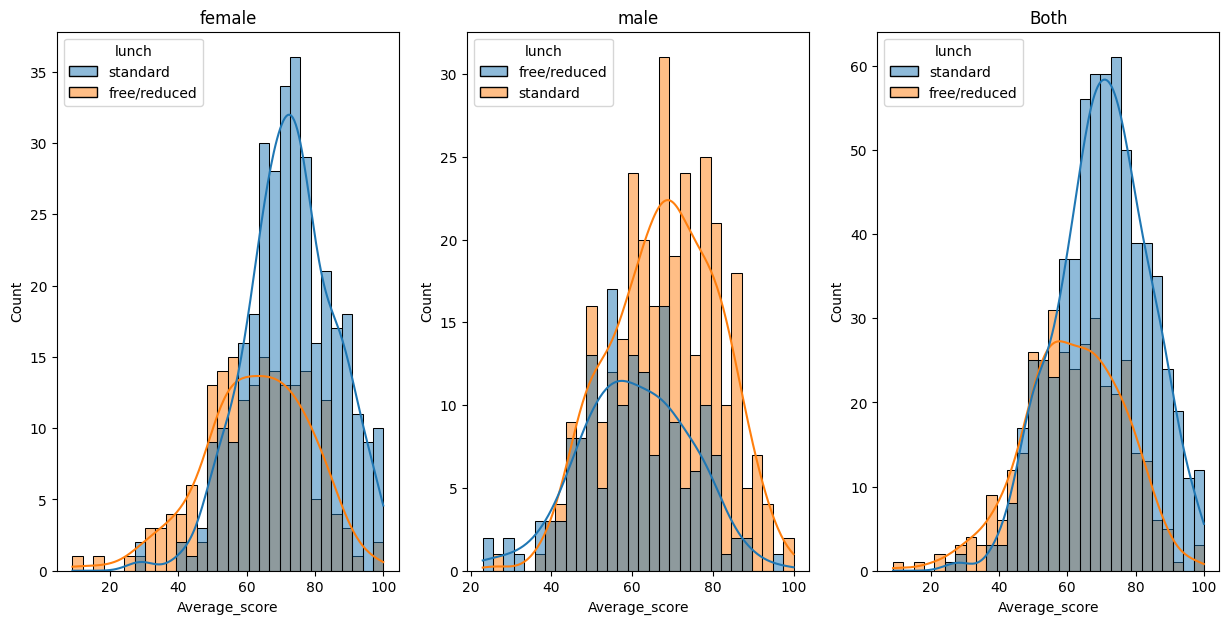

In [20]:
fig,axs = plt.subplots(1,3,figsize=(15,7))

sns.histplot(data=df,x="Average_score",kde=True,bins=30,hue="lunch")
plt.title("Both")
plt.subplot(1,3,1)
sns.histplot(data=df[df["gender"]=="female"],x="Average_score",kde=True,bins=30,hue="lunch")
plt.title("female")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"],x="Average_score",kde=True,bins=30,hue="lunch")
plt.title("male")
plt.subplot(1,3,3)
plt.show()

- Overall everyone done better with a standard lunch

In [21]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Average_score', 'total_score'],
      dtype='object')

<Axes: ylabel='math_score'>

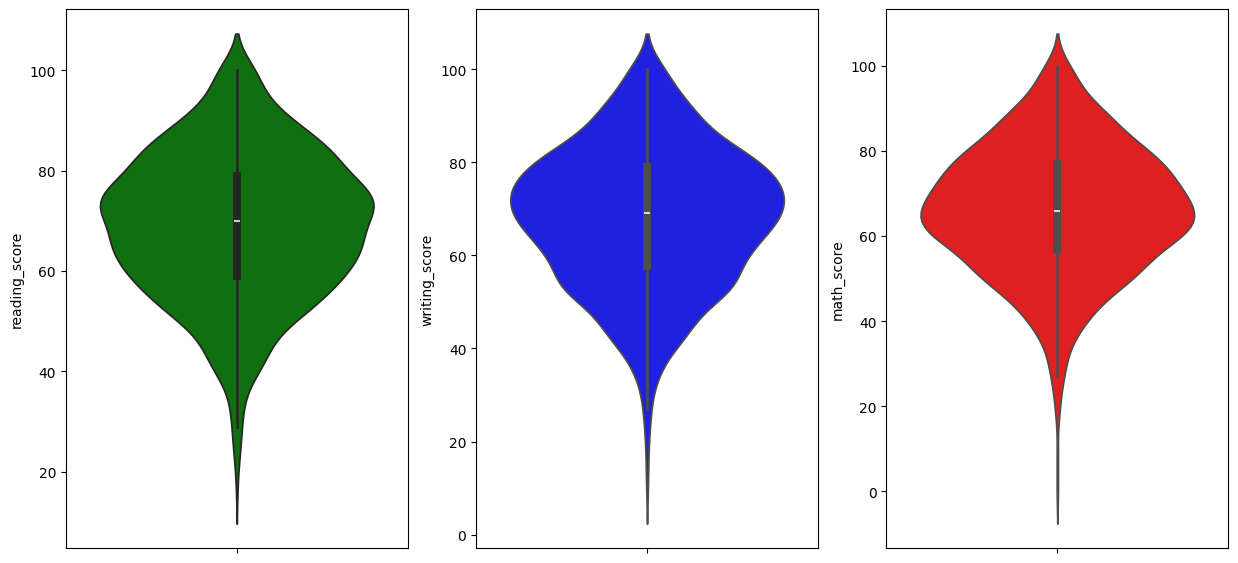

In [24]:
fix, axs = plt.subplots(1,3,figsize=(15,7))
sns.violinplot(data=df,y="math_score",color="red")
plt.subplot(1,3,1)
sns.violinplot(data=df,y="reading_score",color="green")
plt.subplot(1,3,2)
sns.violinplot(data=df,y="writing_score",color="blue")
plt.subplot(1,3,3)

- From above we can see everyone done better in reading and worst in maths

C:\Users\anshuman\AppData\Local\Temp\ipykernel_22400\1098362650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,y="reading_score",x="race_ethnicity",palette="mako",ax=axs[0])
C:\Users\anshuman\AppData\Local\Temp\ipykernel_22400\1098362650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,y="reading_score",x="race_ethnicity",palette="flare",ax=axs[1])
C:\Users\anshuman\AppData\Local\Temp\ipykernel_22400\1098362650.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,y="reading_score",x="race_ethnicity",palette="c

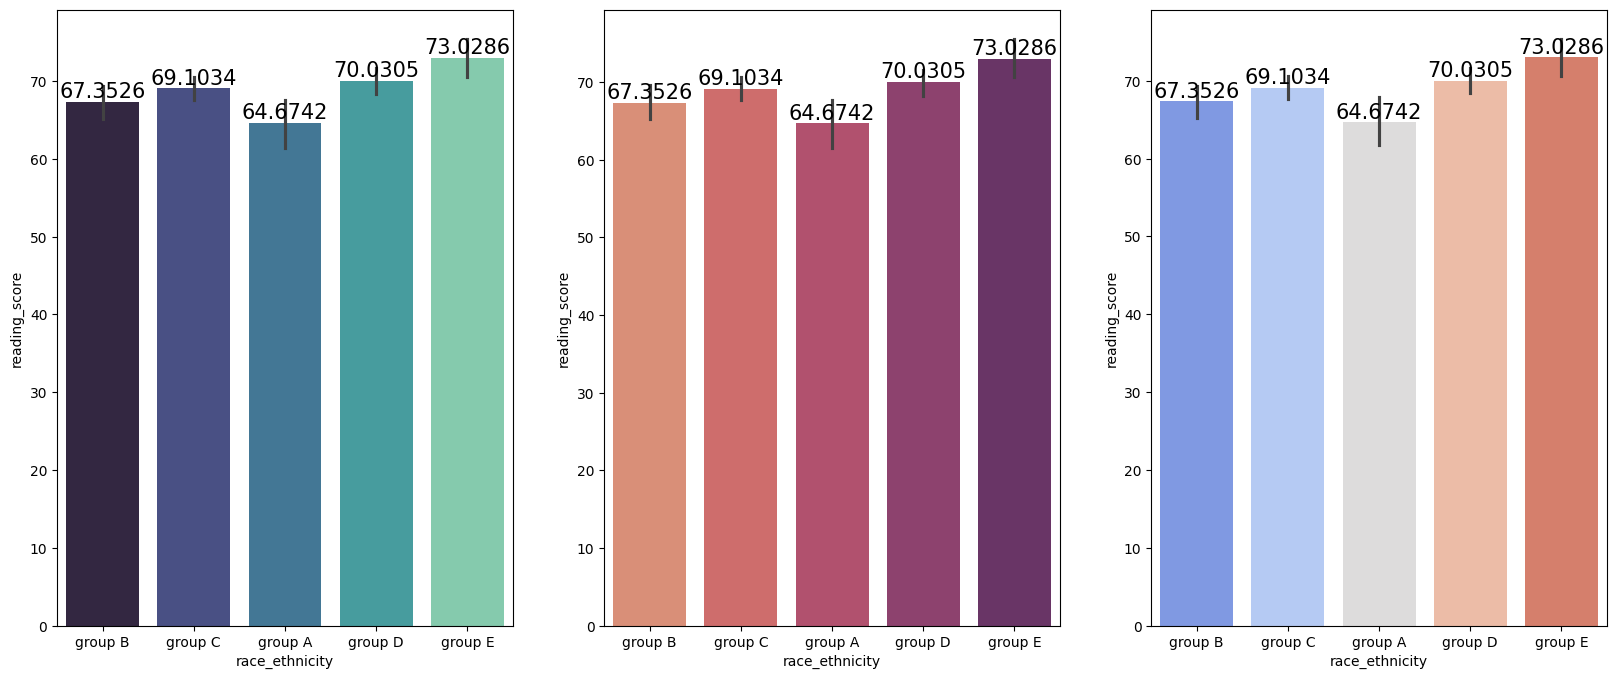

In [33]:
fig, axs = plt.subplots(1,3,figsize=(20,8))
sns.barplot(data=df,y="reading_score",x="race_ethnicity",palette="mako",ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=15)
plt.subplot(1,3,1)
sns.barplot(data=df,y="reading_score",x="race_ethnicity",palette="flare",ax=axs[1])
for container in axs[1].containers:
    axs[1].bar_label(container,color='black',size=15)
plt.subplot(1,3,2)
sns.barplot(data=df,y="reading_score",x="race_ethnicity",palette="coolwarm",ax=axs[2])
for container in axs[2].containers:
    axs[2].bar_label(container,color='black',size=15)
plt.subplot(1,3,3)
plt.show()

#### Checking for outliers

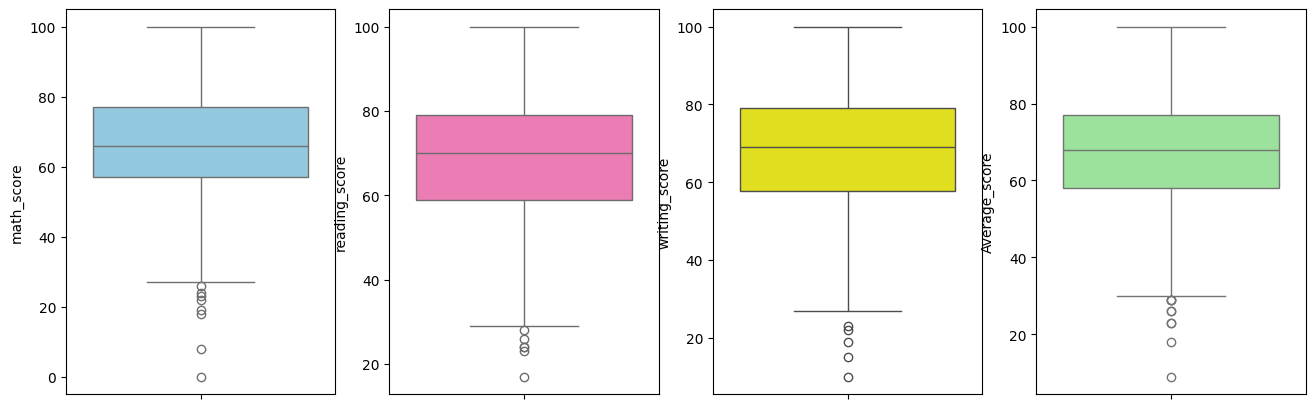

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

- No outliers founded

## Conclusions

- Parental education doesn't matter
- others factors matter in students marks and performance
- no outliers
